# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [23]:
import pandas as pd
import xgboost as xgb

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, generate_results, save_results_to_xlsx, train_model, train_model_cross_val,  train_model_loo, train_model_bootstrapping, train_model_avg_bootstrapping

### Loading data

In [36]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Standardization of Data

In [38]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Data Split: Features and Target

In [31]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


### Data Balancing

In [33]:
X_train, y_train = balance_data_smote(X_train, y_train)
# X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(228, 13)
(228,)


### Logistic Regression

Accuracy: 0.84
ROC AUC Score: 0.84
G-Mean: 0.71
F1 Score: 0.83
Sensitivity: 0.8
Specificity: 0.89
Precision: 0.88
AVG: 0.8


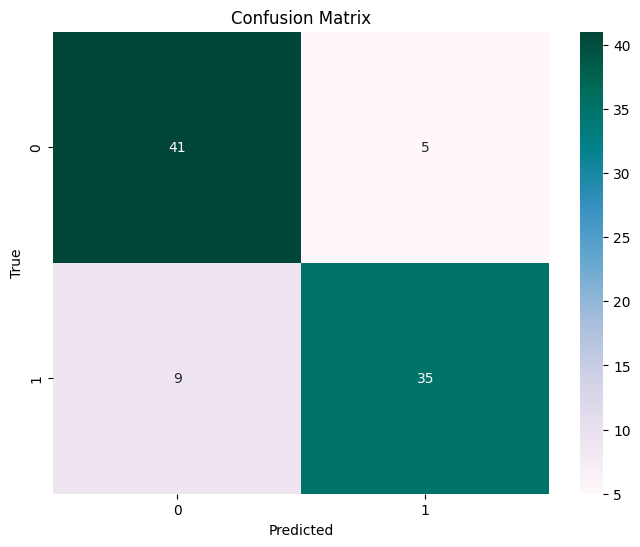

In [30]:
model = LogisticRegression(solver='liblinear')

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Logistic Regression', *avg_results)])

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.84
Sensitivity: 0.8
Specificity: 0.91
Precision: 0.9
AVG: 0.81


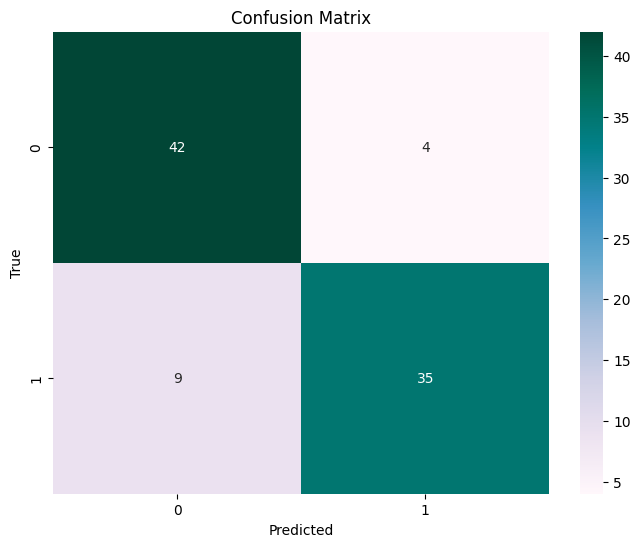

In [29]:
model = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Logistic Regression - liblinear Ridge', *avg_results)])

### Naive Bayes

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.85
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.88
AVG: 0.81


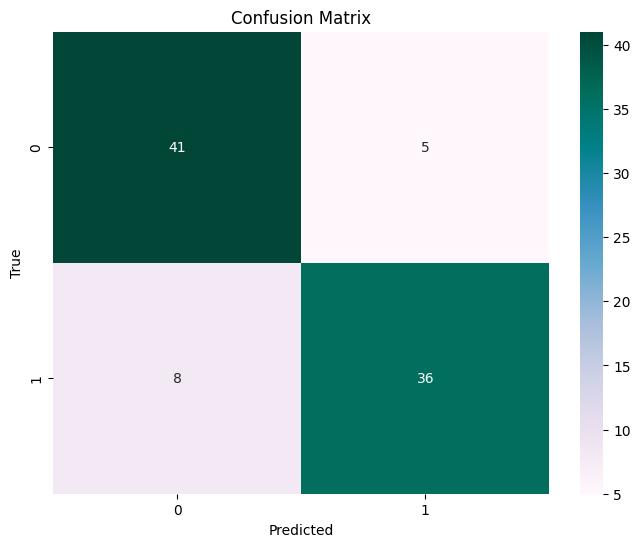

In [8]:
model = GaussianNB()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Naive Bayes', *avg_results)])

### Support Vector Classifier

Accuracy: 0.84
ROC AUC Score: 0.84
G-Mean: 0.71
F1 Score: 0.83
Sensitivity: 0.77
Specificity: 0.91
Precision: 0.89
AVG: 0.79


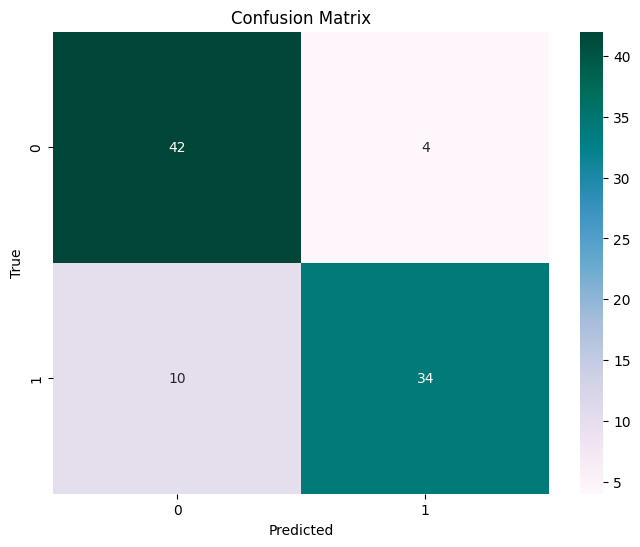

In [22]:
model = SVC(kernel="linear")

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('SVM', *avg_results)])

### Decision Tree

Accuracy: 0.72
ROC AUC Score: 0.72
G-Mean: 0.52
F1 Score: 0.7
Sensitivity: 0.66
Specificity: 0.78
Precision: 0.74
AVG: 0.65


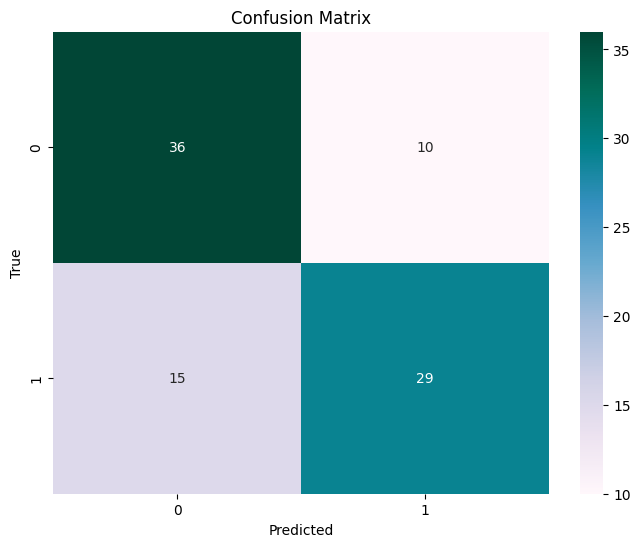

In [10]:
model = DecisionTreeClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Decision Tree', *avg_results)])

### Random Forest

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.65
F1 Score: 0.8
Sensitivity: 0.75
Specificity: 0.87
Precision: 0.85
AVG: 0.75


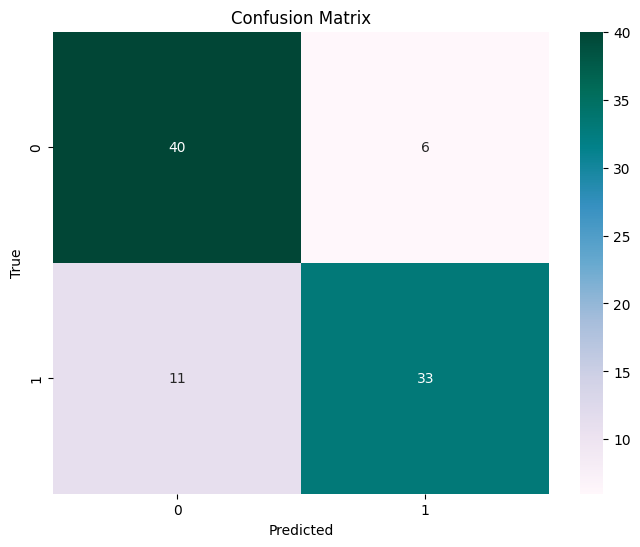

In [11]:
model = RandomForestClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Random Forest', *avg_results)])

### Ada Boost

Accuracy: 0.82
ROC AUC Score: 0.82
G-Mean: 0.67
F1 Score: 0.81
Sensitivity: 0.8
Specificity: 0.85
Precision: 0.83
AVG: 0.77


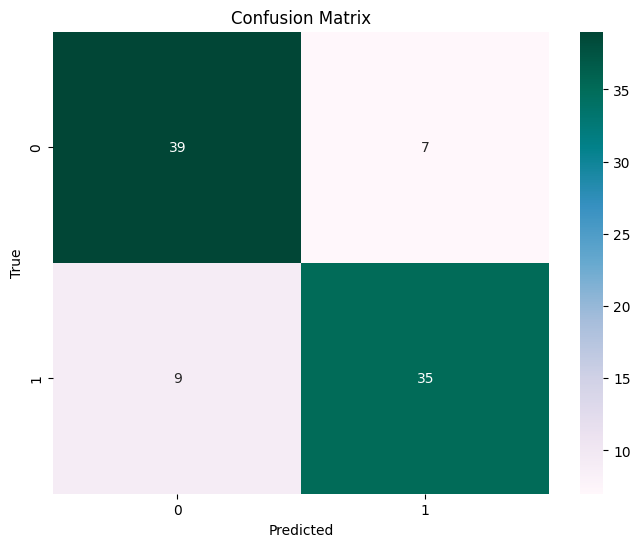

In [12]:
model = AdaBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Ada Boost', *avg_results)])

### Extreme Gradient Boosting (XGBoost)

Accuracy: 0.78
ROC AUC Score: 0.78
G-Mean: 0.6
F1 Score: 0.77
Sensitivity: 0.75
Specificity: 0.8
Precision: 0.79
AVG: 0.72


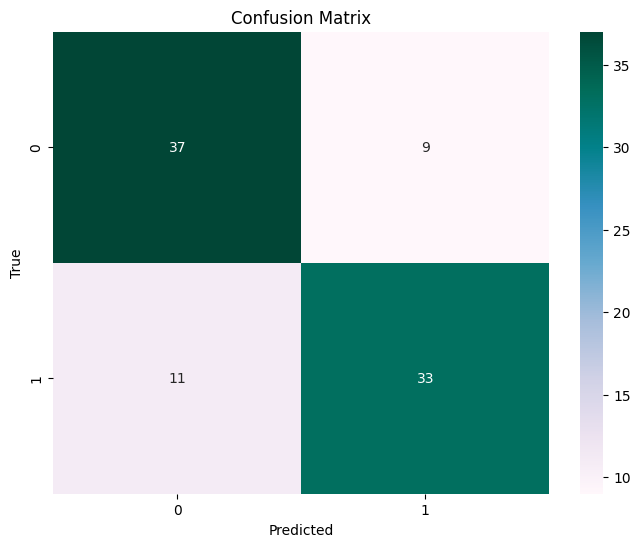

In [13]:
model = xgb.XGBClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('XGBoost', *avg_results)])

### Stochastic Gradient Boosting (SGBoost)

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.64
F1 Score: 0.8
Sensitivity: 0.8
Specificity: 0.8
Precision: 0.8
AVG: 0.75


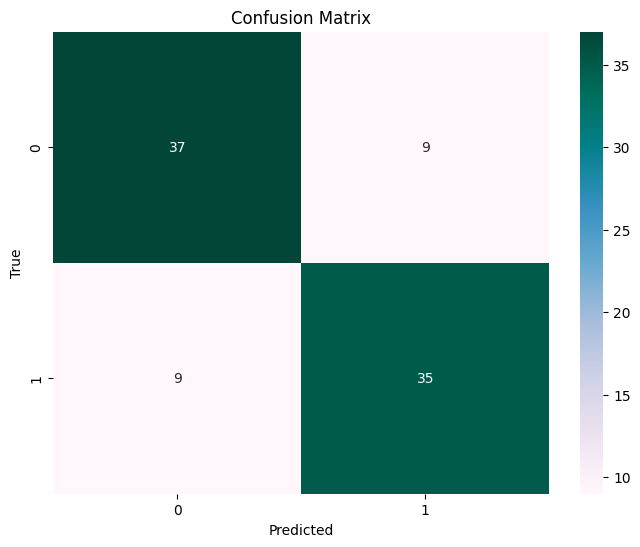

In [14]:
model = HistGradientBoostingClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('SGBoost', *avg_results)])

### Multi-layer Perceptron (Neural Network)

Accuracy: 0.7
ROC AUC Score: 0.7
G-Mean: 0.48
F1 Score: 0.73
Sensitivity: 0.82
Specificity: 0.59
Precision: 0.65
AVG: 0.64


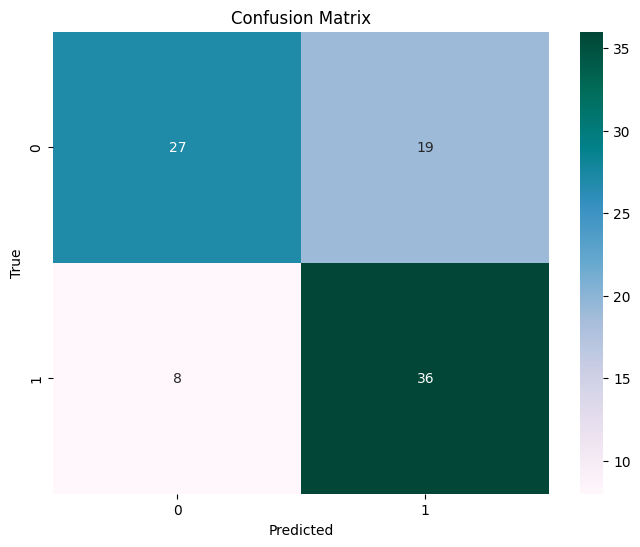

/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: Converg

In [15]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Neural Network', *avg_results)])

### KNeighbors

Accuracy: 0.63
ROC AUC Score: 0.63
G-Mean: 0.4
F1 Score: 0.6
Sensitivity: 0.57
Specificity: 0.7
Precision: 0.64
AVG: 0.54


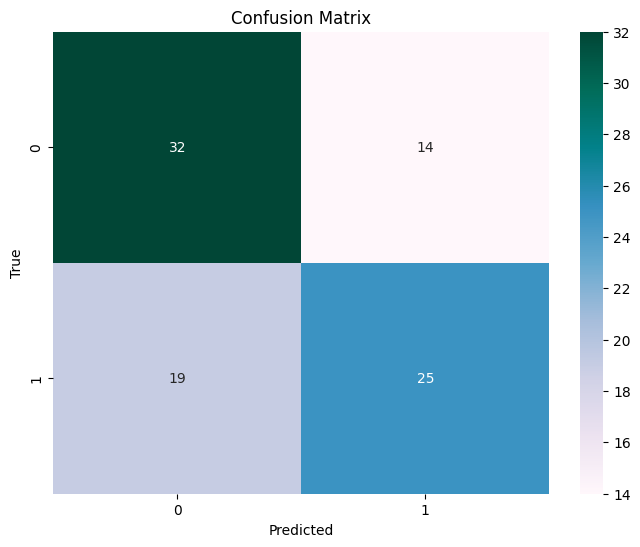

In [16]:
model = KNeighborsClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('KNN', *avg_results)])

### Gradient Boosting

Accuracy: 0.78
ROC AUC Score: 0.78
G-Mean: 0.6
F1 Score: 0.76
Sensitivity: 0.73
Specificity: 0.83
Precision: 0.8
AVG: 0.71


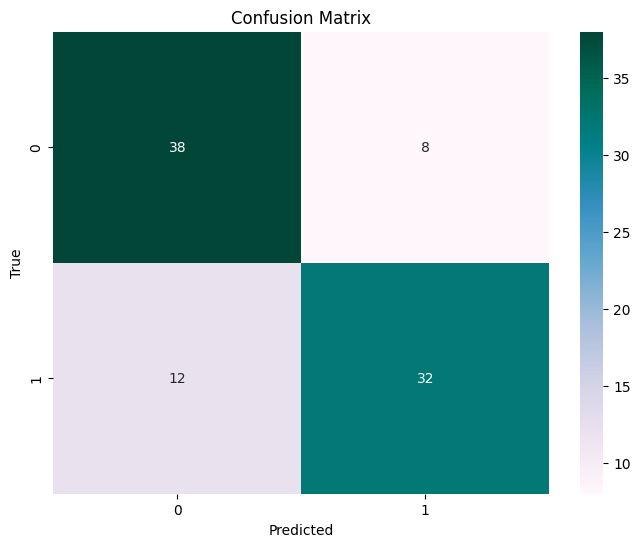

In [17]:
model = GradientBoostingClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('results', [('Gradient Boosting', *avg_results)])

### Cat Boost

Learning rate set to 0.00548
0:	learn: 0.6890007	total: 1.41ms	remaining: 1.41s
1:	learn: 0.6839973	total: 7.37ms	remaining: 3.68s
2:	learn: 0.6789705	total: 9.43ms	remaining: 3.13s
3:	learn: 0.6743611	total: 10.6ms	remaining: 2.64s
4:	learn: 0.6703719	total: 11.9ms	remaining: 2.36s
5:	learn: 0.6660143	total: 13.3ms	remaining: 2.21s
6:	learn: 0.6621683	total: 14.3ms	remaining: 2.03s
7:	learn: 0.6578159	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6539232	total: 16.3ms	remaining: 1.8s
9:	learn: 0.6500328	total: 17.4ms	remaining: 1.72s
10:	learn: 0.6456049	total: 18.4ms	remaining: 1.65s
11:	learn: 0.6416981	total: 19.4ms	remaining: 1.59s
12:	learn: 0.6384558	total: 20.5ms	remaining: 1.56s
13:	learn: 0.6342852	total: 21.6ms	remaining: 1.52s
14:	learn: 0.6304081	total: 22.6ms	remaining: 1.49s
15:	learn: 0.6270263	total: 23.9ms	remaining: 1.47s
16:	learn: 0.6230572	total: 25.3ms	remaining: 1.46s
17:	learn: 0.6190888	total: 26.6ms	remaining: 1.45s
18:	learn: 0.6155841	total: 27.5ms	remaining: 1

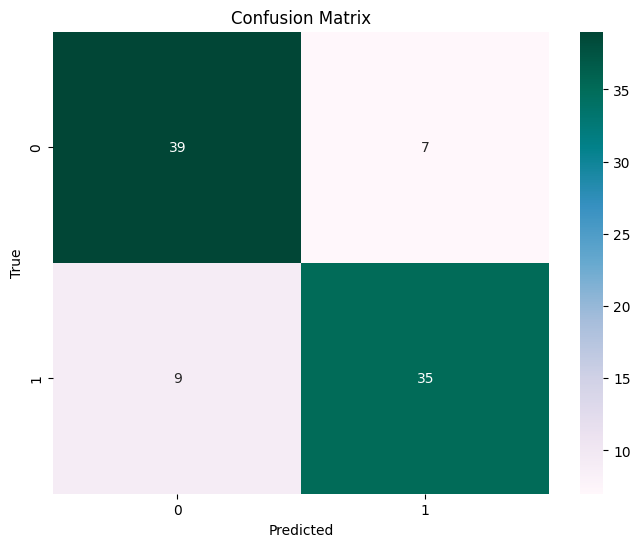

Learning rate set to 0.006135
0:	learn: 0.6876413	total: 975us	remaining: 974ms
1:	learn: 0.6816181	total: 1.88ms	remaining: 939ms
2:	learn: 0.6751317	total: 2.8ms	remaining: 931ms
3:	learn: 0.6696552	total: 3.83ms	remaining: 955ms
4:	learn: 0.6645724	total: 5.57ms	remaining: 1.11s
5:	learn: 0.6594277	total: 6.89ms	remaining: 1.14s
6:	learn: 0.6555490	total: 8.11ms	remaining: 1.15s
7:	learn: 0.6496428	total: 8.99ms	remaining: 1.11s
8:	learn: 0.6447360	total: 9.88ms	remaining: 1.09s
9:	learn: 0.6403231	total: 10.7ms	remaining: 1.06s
10:	learn: 0.6347259	total: 11.6ms	remaining: 1.04s
11:	learn: 0.6292937	total: 12.6ms	remaining: 1.04s
12:	learn: 0.6232770	total: 13.5ms	remaining: 1.02s
13:	learn: 0.6180119	total: 14.3ms	remaining: 1.01s
14:	learn: 0.6132550	total: 15.2ms	remaining: 999ms
15:	learn: 0.6076936	total: 16.1ms	remaining: 990ms
16:	learn: 0.6024911	total: 17.1ms	remaining: 986ms
17:	learn: 0.5977923	total: 18.2ms	remaining: 993ms
18:	learn: 0.5928754	total: 19.4ms	remaining: 

In [19]:
model = CatBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('Cat Boost', *avg_results)])

### LGBM

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

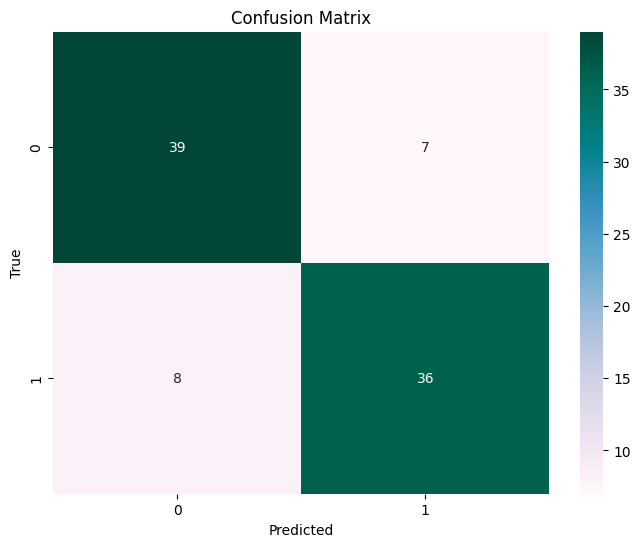

[LightGBM] [Info] Number of positive: 145, number of negative: 152
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488215 -> initscore=-0.047147
[LightGBM] [Info] Start training from score -0.047147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [20]:
model = LGBMClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('results', [('LGBM', *avg_results)])